In [1]:
from utils.libs import *

In [2]:
# agp_df = load_agp_dataframe()

['0,00\t00,00\t00,00\t00,00\t00,00\t00,00\t0,00',
 '0,00\t25,00\t34,99\t34,99\t45,00\t54,98\t0,00',
 '0,00\t25,00\t34,99\t34,99\t50,00\t50,00\t0,00',
 '0,00\t34,99\t29,98\t25,00\t25,00\t50,00\t0,00',
 '0,00\t25,00\t34,99\t54,98\t25,00\t25,00\t0,00',
 '0,00\t34,99\t29,98\t29,98\t29,98\t34,99\t0,00',
 '0,00\t25,00\t29,98\t29,98\t29,98\t50,00\t0,00',
 '']
['0,00\t00,00\t00,00\t00,00\t00,00\t00,00\t0,00',
 '0,00\t25,00\t34,99\t34,99\t45,00\t54,98\t0,00',
 '0,00\t25,00\t34,99\t34,99\t50,00\t50,00\t0,00',
 '0,00\t34,99\t29,98\t25,00\t25,00\t50,00\t0,00',
 '0,00\t25,00\t34,99\t54,98\t25,00\t25,00\t0,00',
 '0,00\t34,99\t29,98\t29,98\t29,98\t34,99\t0,00',
 '0,00\t25,00\t29,98\t29,98\t29,98\t50,00\t0,00']
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 25.0, 34.99, 34.99, 45.0, 54.98, 0.0],
 [0.0, 25.0, 34.99, 34.99, 50.0, 50.0, 0.0],
 [0.0, 34.99, 29.98, 25.0, 25.0, 50.0, 0.0],
 [0.0, 25.0, 34.99, 54.98, 25.0, 25.0, 0.0],
 [0.0, 34.99, 29.98, 29.98, 29.98, 34.99, 0.0],
 [0.0, 25.0, 29.98, 29.98, 2

In [3]:
# --- Read config file for runnig notebook.

conf_file_path = 'conf.txt'
conf_data = read_conf_file(conf_file_path)

In [4]:
# -- Define named tuple for query db to retrieve data.
typename = 'QueryConstraints'
field_names = "image;date;timestamp;hidden_features;image_size;status".split(";")
field_types = "str;str;str;int;str;str".split(";")

QueryConstraints = collections.namedtuple(typename, field_names)

In [5]:
image = dict(zip(['type', 'val'], [str, list(sorted("cameramen".split(";")))]))
date = None
timestamp = dict(zip(['type', 'val'], [str, list(sorted("".split(";")))]))
hidden_features = dict(zip(['type', 'val'], [int, list(sorted("".split(";")))]))
image_size = dict(zip(['type', 'val'], [str, list(sorted("[256,256]".split(";")))]))
status = dict(zip(['type', 'val'], [str, list(sorted("done".split(";")))]))

fields_list = [image, date, timestamp, hidden_features, image_size, status]
constraints = QueryConstraints._make(fields_list)

pprint(constraints)

QueryConstraints(image={'type': <class 'str'>, 'val': ['cameramen']}, date=None, timestamp={'type': <class 'str'>, 'val': ['']}, hidden_features={'type': <class 'int'>, 'val': ['']}, image_size={'type': <class 'str'>, 'val': ['[256,256]']}, status={'type': <class 'str'>, 'val': ['done']})


In [6]:
records_list, result_dict_df, query_str, chained_constraints = fetch_data_by_constraints(
    conf_data, constraints, fetch_data_downloaded = True)

SELECT image,date,timestamp,hidden_features,image_size,status,data_downloaded FROM table_runs_logged WHERE   (image = 'cameramen') AND (image_size = '[256,256]')  AND (status = 'done') ;
Error: file 'D:\data\data_thesys\cameramen\07-11-2020\1604779421-808068\train\result_comb_train.txt' does not exists!


In [7]:
data = list(map(operator.methodcaller('_asdict'), records_list))
records_df = pd.DataFrame(data = data)

records_df.head(5)

,image,date,timestamp,hidden_features,image_size,status,data_downloaded,full_path
0,cameramen,23/10/20,1603478755-305517,75,"[256,256]",done,TRUE,D:\data\data_thesys\cameramen\23-10-2020\16034...
1,cameramen,24/10/20,1603557121-338703,55,"[256,256]",done,TRUE,D:\data\data_thesys\cameramen\24-10-2020\16035...
2,cameramen,25/10/20,1603583765-067812,55,"[256,256]",done,TRUE,D:\data\data_thesys\cameramen\25-10-2020\16035...
3,cameramen,26/10/20,1603672968-148557,85,"[256,256]",done,TRUE,D:\data\data_thesys\cameramen\26-10-2020\16036...
4,cameramen,26/10/20,1603731938-952001,85,"[256,256]",done,TRUE,D:\data\data_thesys\cameramen\26-10-2020\16037...


In [8]:
data = list(map(operator.itemgetter(1), result_dict_df.items()))
train_df = pd.concat(data)

train_df.head(5)

,#params,seed,hl,hf,mse,psnr,ssim,eta
1603478755-305517,57301.0,0.0,10.0,75.0,0.000006,58.145780,0.998769,2688.703879
1603478755-305517,57301.0,42.0,10.0,75.0,0.000009,56.492704,0.998202,2690.827056
1603478755-305517,57301.0,123.0,10.0,75.0,0.000006,58.214385,0.999085,2686.608420
1603478755-305517,63001.0,0.0,11.0,75.0,0.000018,53.486111,0.997542,2904.513145
1603478755-305517,63001.0,42.0,11.0,75.0,0.000005,58.401365,0.999003,2906.302068


Image size: (512, 512)


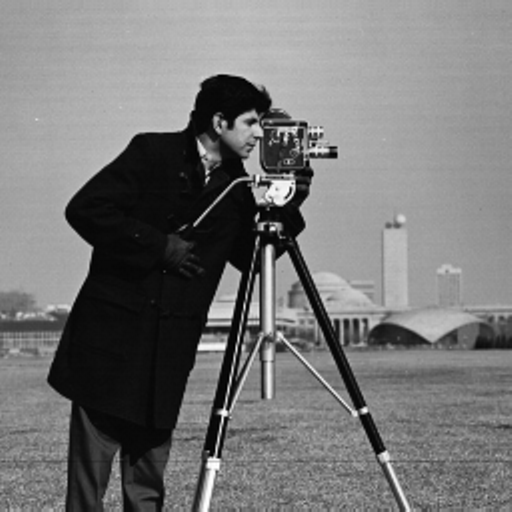

In [9]:
# --- Load target image.
im = load_target_image(image_file_path = None)
print('Image size:', im.size)
im

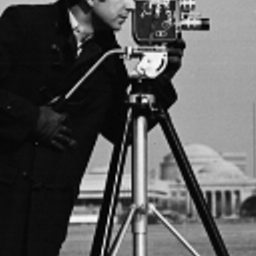

In [10]:
crop_size = (256,256)
im_cropped = get_cropped_by_center_image(im, target = crop_size)
im_cropped

In [11]:
# --- Array of qualities to be tested in compression.
qualities_arr = np.arange(20, 95+1, dtype = np.int)

In [12]:
# --- Run several trials for JPEG compression.

cropped_file_size_bits = None

# im_cropped = im
# im_cropped = Image.fromarray(skimage.data.camera())
with BytesIO() as f:
    im_cropped.save(f, format='PNG')
    cropped_file_size_bits = f.getbuffer().nbytes * 8
    pass

result_tuples, failure_qualities = \
  calculate_several_jpeg_compression(im_cropped, cropped_file_size_bits, qualities_arr)

In [13]:
# data = list(map(lambda xx: xx._asdict(), result_tuples))
data = list(map(operator.methodcaller('_asdict'), result_tuples))
result_jpeg_df = pd.DataFrame(data = data)
result_jpeg_df.head(5)

,mse,psnr,ssim,quality,file_size_bits,bpp,width,heigth,CR
0,30.618301,33.270993,0.939424,20,33064,0.504517,256,256,7.682071
1,28.949783,33.514350,0.940436,21,33968,0.518311,256,256,7.477626
2,27.839966,33.684117,0.941620,22,34736,0.530029,256,256,7.312298
3,26.316681,33.928492,0.944786,23,35408,0.540283,256,256,7.173520
4,25.208344,34.115361,0.946817,24,36000,0.549316,256,256,7.055556


In [14]:
train_df['bpp'] = train_df['#params'].values * 32 / (im_cropped.size[0] * im_cropped.size[1])

In [15]:
train_df['compression'] = list(map(lambda hf: f'siren-{hf}', train_df['hf'].values.astype(dtype = np.int)))

In [16]:
result_jpeg_df['compression'] = ['jpeg'] * result_jpeg_df.shape[0]
# train_df['compression'] = ['siren'] * train_df.shape[0]
train_df['file_size_bits'] = train_df['#params'].values * 32
train_df['CR'] = cropped_file_size_bits / (train_df['#params'].values * 32)

In [17]:
train_df_columns_for_merge = "psnr,ssim,CR,bpp,file_size_bits,compression".split(",")
result_jpeg_df_columns_for_merge = "psnr,ssim,CR,bpp,file_size_bits,compression".split(",")

data_frames_list = [
    train_df[train_df_columns_for_merge],
    result_jpeg_df[result_jpeg_df_columns_for_merge],
]
merged_df = pd.concat(data_frames_list, names = "psnr,ssim,CR,bpp,file_size_bits,compression".split(","))

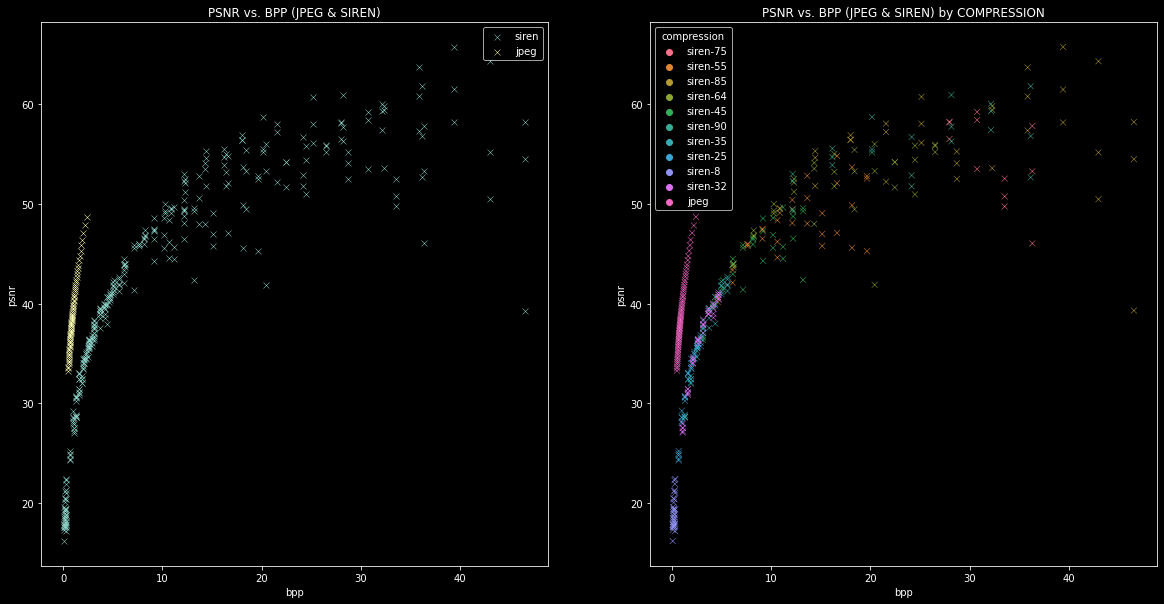

In [18]:
x = 'bpp'; y = "psnr"

fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = train_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = result_jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])

axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

hue='compression'
chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, hue=f'{hue}', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by {hue.upper()}')
plt.show()

In [19]:
agp_df = load_agp_dataframe()

['0,00\t00,00\t00,00\t00,00\t00,00\t00,00\t0,00',
 '0,00\t25,00\t34,99\t34,99\t45,00\t54,98\t0,00',
 '0,00\t25,00\t34,99\t34,99\t50,00\t50,00\t0,00',
 '0,00\t34,99\t29,98\t25,00\t25,00\t50,00\t0,00',
 '0,00\t25,00\t34,99\t54,98\t25,00\t25,00\t0,00',
 '0,00\t34,99\t29,98\t29,98\t29,98\t34,99\t0,00',
 '0,00\t25,00\t29,98\t29,98\t29,98\t50,00\t0,00',
 '']
['0,00\t00,00\t00,00\t00,00\t00,00\t00,00\t0,00',
 '0,00\t25,00\t34,99\t34,99\t45,00\t54,98\t0,00',
 '0,00\t25,00\t34,99\t34,99\t50,00\t50,00\t0,00',
 '0,00\t34,99\t29,98\t25,00\t25,00\t50,00\t0,00',
 '0,00\t25,00\t34,99\t54,98\t25,00\t25,00\t0,00',
 '0,00\t34,99\t29,98\t29,98\t29,98\t34,99\t0,00',
 '0,00\t25,00\t29,98\t29,98\t29,98\t50,00\t0,00']
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 25.0, 34.99, 34.99, 45.0, 54.98, 0.0],
 [0.0, 25.0, 34.99, 34.99, 50.0, 50.0, 0.0],
 [0.0, 34.99, 29.98, 25.0, 25.0, 50.0, 0.0],
 [0.0, 25.0, 34.99, 54.98, 25.0, 25.0, 0.0],
 [0.0, 34.99, 29.98, 29.98, 29.98, 34.99, 0.0],
 [0.0, 25.0, 29.98, 29.98, 2

In [20]:
agp_df

,net.0.linear,net.1.linear,net.2.linear,net.3.linear,net.4.linear,net.5.linear,net.6,mse,psnr,ssim
0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.000049,49.156749,0.995518
1,0.0,25.00,34.99,34.99,45.00,54.98,0.0,0.000049,45.815070,0.995518
2,0.0,25.00,34.99,34.99,50.00,50.00,0.0,0.000119,45.284305,0.988715
3,0.0,34.99,29.98,25.00,25.00,50.00,0.0,0.000133,44.789306,0.990356
4,0.0,25.00,34.99,54.98,25.00,25.00,0.0,0.000122,45.153248,0.990075
5,0.0,34.99,29.98,29.98,29.98,34.99,0.0,0.000115,45.418737,0.990626
6,0.0,25.00,29.98,29.98,29.98,50.00,0.0,0.000162,43.930189,0.989889


In [21]:
baseline_values_ws = "128,4096,4096,4096,4096,4096,64".split(",")
baseline_values_ws = list(map(float, baseline_values_ws))

In [22]:
tot_ws_baseline = sum(baseline_values_ws)
tot_ws_baseline

20672.0

In [23]:
agp_record_columns = list(map(lambda xx: xx.replace('.', '_') if '.' in xx else xx, agp_df.columns))
AGPRecord = collections.namedtuple('AGPRecord', list(agp_record_columns))
def calc_weights(a_row, baseline_values_ws=baseline_values_ws):
    agp_record = AGPRecord._make(a_row)
    pr_rates = np.array(a_row[0:6+1])
    ws = sum((100 - pr_rates) * np.array(baseline_values_ws)/100)
    return ws
agp_df['weights'] = list(map(calc_weights, agp_df.values))

agp_record_columns = list(map(lambda xx: xx.replace('.', '_') if '.' in xx else xx, agp_df.columns))
AGPRecord = collections.namedtuple('AGPRecord', list(agp_record_columns))
def calc_bpp(a_row, w=256, h=256):
    agp_record = AGPRecord._make(a_row)
    return agp_record.weights * 32 / (w * h)
agp_df['bpp'] = list(map(calc_bpp, agp_df.values))

agp_record_columns = list(map(lambda xx: xx.replace('.', '_') if '.' in xx else xx, agp_df.columns))
AGPRecord = collections.namedtuple('AGPRecord', list(agp_record_columns))
def calc_overall_compression(a_row, tot_ws_baseline=tot_ws_baseline):
    agp_record = AGPRecord._make(a_row)
    return 'agp-siren' +  '-' + str(int(np.ceil(100 - agp_record.weights / tot_ws_baseline * 100)))
agp_df['compression'] = list(map(calc_overall_compression, agp_df.values))

agp_record_columns = list(map(lambda xx: xx.replace('.', '_') if '.' in xx else xx, agp_df.columns))
AGPRecord = collections.namedtuple('AGPRecord', list(agp_record_columns))
def calc_file_size_bits(a_row):
    agp_record = AGPRecord._make(a_row)
    return agp_record.weights * 32
agp_df['file_size_bits'] = list(map(calc_file_size_bits, agp_df.values))

agp_record_columns = list(map(lambda xx: xx.replace('.', '_') if '.' in xx else xx, agp_df.columns))
AGPRecord = collections.namedtuple('AGPRecord', list(agp_record_columns))
def calc_cr(a_row, cropped_file_size_bits=cropped_file_size_bits):
    agp_record = AGPRecord._make(a_row)
    return cropped_file_size_bits / (agp_record.weights * 32)
agp_df['CR'] = list(map(calc_cr, agp_df.values))

agp_df

,net.0.linear,net.1.linear,net.2.linear,net.3.linear,net.4.linear,net.5.linear,net.6,mse,psnr,ssim,weights,bpp,compression,file_size_bits,CR
0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.000049,49.156749,0.995518,20672.0000,10.09375,agp-siren-0,661504.0000,0.383973
1,0.0,25.00,34.99,34.99,45.00,54.98,0.0,0.000049,45.815070,0.995518,12686.4384,6.19455,agp-siren-39,405966.0288,0.625668
2,0.0,25.00,34.99,34.99,50.00,50.00,0.0,0.000119,45.284305,0.988715,12685.6192,6.19415,agp-siren-39,405939.8144,0.625709
3,0.0,34.99,29.98,25.00,25.00,50.00,0.0,0.000133,44.789306,0.990356,13914.8288,6.79435,agp-siren-33,445274.5216,0.570435
4,0.0,25.00,34.99,54.98,25.00,25.00,0.0,0.000122,45.153248,0.990075,13914.8288,6.79435,agp-siren-33,445274.5216,0.570435
5,0.0,34.99,29.98,29.98,29.98,34.99,0.0,0.000115,45.418737,0.990626,14121.6768,6.89535,agp-siren-32,451893.6576,0.562079
6,0.0,25.00,29.98,29.98,29.98,50.00,0.0,0.000162,43.930189,0.989889,13916.0576,6.79495,agp-siren-33,445313.8432,0.570384


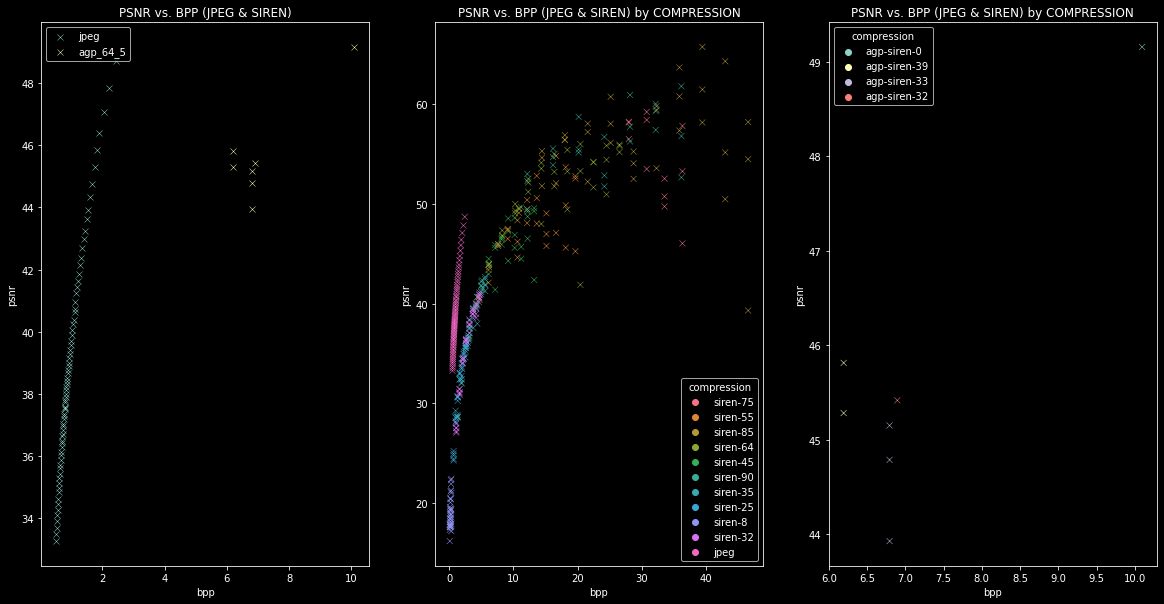

In [24]:
x = 'bpp'; y = "psnr"

fig, axes  = plt.subplots(1, 3, figsize = (20, 10))
# sns.scatterplot(data = train_df[train_df[""]], x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = result_jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])
sns.scatterplot(data = agp_df, x=f"{x}", y=f"{y}", label = 'agp_64_5', marker = 'x', ax = axes[0])

axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

hue='compression'
chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, hue=f'{hue}', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by {hue.upper()}')
# plt.show()

hue='compression'
chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=agp_df, hue=f'{hue}', marker='x', ax = axes[2])
axes[2].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by {hue.upper()}')
plt.show()

In [25]:
train_df_columns_for_merge = "psnr,ssim,CR,bpp,file_size_bits,compression".split(",")
result_jpeg_df_columns_for_merge = "psnr,ssim,CR,bpp,file_size_bits,compression".split(",")

data_frames_list = [
    agp_df[train_df_columns_for_merge],
    # result_jpeg_df[result_jpeg_df_columns_for_merge],
    merged_df
]
merged_df_2 = pd.concat(data_frames_list, names = "psnr,ssim,CR,bpp,file_size_bits,compression".split(","))

In [26]:
merged_df_2

,psnr,ssim,CR,bpp,file_size_bits,compression
0,49.156749,0.995518,0.383973,10.093750,661504.0000,agp-siren-0
1,45.815070,0.995518,0.625668,6.194550,405966.0288,agp-siren-39
2,45.284305,0.988715,0.625709,6.194150,405939.8144,agp-siren-39
3,44.789306,0.990356,0.570435,6.794350,445274.5216,agp-siren-33
4,45.153248,0.990075,0.570435,6.794350,445274.5216,agp-siren-33
...,...,...,...,...,...,...
71,45.839283,0.993285,2.125025,1.823853,119528.0000,jpeg
72,46.388042,0.993804,2.050371,1.890259,123880.0000,jpeg
73,47.078218,0.994504,1.896541,2.043579,133928.0000,jpeg
74,47.827533,0.995091,1.746329,2.219360,145448.0000,jpeg


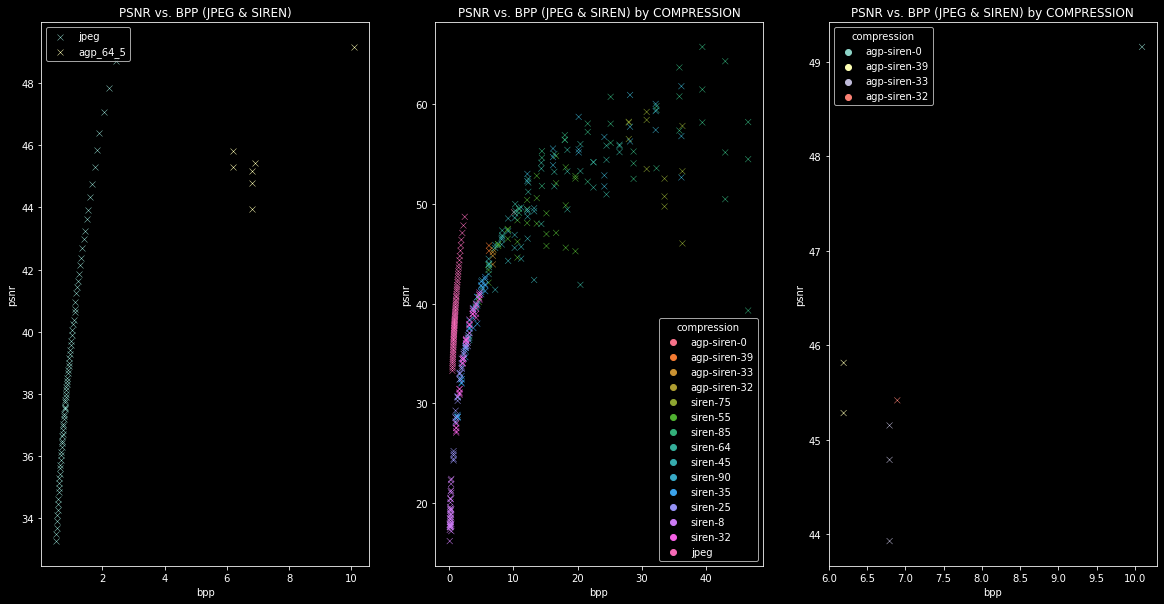

In [27]:
x = 'bpp'; y = "psnr"

fig, axes  = plt.subplots(1, 3, figsize = (20, 10))
# sns.scatterplot(data = train_df[train_df[""]], x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = result_jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])
sns.scatterplot(data = agp_df, x=f"{x}", y=f"{y}", label = 'agp_64_5', marker = 'x', ax = axes[0])

axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

hue='compression'
chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df_2, hue=f'{hue}', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by {hue.upper()}')
# plt.show()

hue='compression'
chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=agp_df, hue=f'{hue}', marker='x', ax = axes[2])
axes[2].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by {hue.upper()}')
plt.show()

In [28]:
print(agp_df.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrlrr}
\toprule
 net.0.linear &  net.1.linear &  net.2.linear &  net.3.linear &  net.4.linear &  net.5.linear &  net.6 &       mse &       psnr &      ssim &     weights &       bpp &   compression &  file\_size\_bits &        CR \\
\midrule
          0.0 &          0.00 &          0.00 &          0.00 &          0.00 &          0.00 &    0.0 &  0.000049 &  49.156749 &  0.995518 &  20672.0000 &  10.09375 &   agp-siren-0 &     661504.0000 &  0.383973 \\
          0.0 &         25.00 &         34.99 &         34.99 &         45.00 &         54.98 &    0.0 &  0.000049 &  45.815070 &  0.995518 &  12686.4384 &   6.19455 &  agp-siren-39 &     405966.0288 &  0.625668 \\
          0.0 &         25.00 &         34.99 &         34.99 &         50.00 &         50.00 &    0.0 &  0.000119 &  45.284305 &  0.988715 &  12685.6192 &   6.19415 &  agp-siren-39 &     405939.8144 &  0.625709 \\
          0.0 &         34.99 &         29.98 &         25.00 &         25.00 &        

In [48]:
# headers = agp_df.columns
headers = "compression,weights,bpp,psnr,file_size_bits,CR".split(",")
table_1 = tabulate.tabulate(agp_df[headers], headers=headers, tablefmt="github")
df_1 = agp_df[headers]
print(table_1)

|    | compression   |   weights |      bpp |    psnr |   file_size_bits |       CR |
|----|---------------|-----------|----------|---------|------------------|----------|
|  0 | agp-siren-0   |   20672   | 10.0938  | 49.1567 |           661504 | 0.383973 |
|  1 | agp-siren-39  |   12686.4 |  6.19455 | 45.8151 |           405966 | 0.625668 |
|  2 | agp-siren-39  |   12685.6 |  6.19415 | 45.2843 |           405940 | 0.625709 |
|  3 | agp-siren-33  |   13914.8 |  6.79435 | 44.7893 |           445275 | 0.570435 |
|  4 | agp-siren-33  |   13914.8 |  6.79435 | 45.1532 |           445275 | 0.570435 |
|  5 | agp-siren-32  |   14121.7 |  6.89535 | 45.4187 |           451894 | 0.562079 |
|  6 | agp-siren-33  |   13916.1 |  6.79495 | 43.9302 |           445314 | 0.570384 |


In [49]:
headers = "compression,weights,bpp,psnr,file_size_bits,CR".split(",")
mean_description = agp_df[headers].iloc[1:,:].mean(axis=0)
table_2 = tabulate.tabulate([list(mean_description.values)], headers=mean_description.index, tablefmt="github")
print(table_2)

|   weights |     bpp |    psnr |   file_size_bits |       CR |
|-----------|---------|---------|------------------|----------|
|   13539.9 | 6.61128 | 45.0651 |           433277 | 0.587452 |


In [77]:
import ipywidgets as widgets
from IPython.display import display
# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()
widget3 = widgets.Output()
widget4 = widgets.Output()

# render in output widgets
with widget1:
    df_1["weights"] = np.ceil(df_1["weights"].values).astype(dtype=np.int)
    df_1["file_size_bits"] = np.ceil(df_1["file_size_bits"].values).astype(dtype=np.int)
    display(df_1.style.hide_index())
with widget2:
    mean_description_df = pd.DataFrame(data = list(zip(mean_description.index, list(mean_description))), columns='Avg-Stats-Siren,Value'.split(","))
    display(mean_description_df.style.hide_index())
with widget3:
    data = dict(
        bpp=8.0040283203125,
        size=int(256*256*8),
    )
    image_df = pd.DataFrame(data = [data], )
    tmp_img_df = image_df.T
    tmp_img_df.columns = "cameramen".split(",")
    # display(tmp_img_df.style.hide_index())
    display(tmp_img_df.style)
with widget4:
    headers = "compression,quality,bpp,psnr,file_size_bits,CR".split(",")
    display(result_jpeg_df[headers].tail(7).style.hide_index())

sidebyside = widgets.HBox([widget1, widget2, widget3, widget4])
display(sidebyside)

In [70]:
headers = "compression,quality,bpp,psnr,file_size_bits,CR".split(",")
result_jpeg_df[headers].tail(5)

,compression,quality,bpp,psnr,file_size_bits,CR
71,jpeg,91,1.823853,45.839283,119528,2.125025
72,jpeg,92,1.890259,46.388042,123880,2.050371
73,jpeg,93,2.043579,47.078218,133928,1.896541
74,jpeg,94,2.219360,47.827533,145448,1.746329
75,jpeg,95,2.424683,48.693716,158904,1.598449


## Save resulting Dataframes
---

In [30]:
agp_df.to_csv('agp_siren_64_5.csv')

In [31]:
merged_df.to_csv('jpeg_siren.csv')